In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Data Preparation

In [2]:
def read_data(path):  #? date_col is a list

    data = pd.read_csv(path,
                            infer_datetime_format=True,
                            on_bad_lines='warn',
                            skip_blank_lines=True)

    try:
        df = data.sort_index()
        #df = df.drop(columns=date_col)
    except:
        print("Unexpected error:", sys.exc_info()[0])

    print(df)
    print('\n', df.dtypes)
    return df

In [9]:
def nan(df):
    print("Process Nan...")
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    for col in numeric_cols:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))
        if (pct_missing < 4) and (type(df[col]) == int) | (type(df[col]) == float):                                             #* if NaN < 4% : replace by median
            med = df[col].median()
            df[col] = df[col].fillna(med)
        if pct_missing >= 20:                                           #* if NaN > 20% : drop features
            df = df.drop(columns=[col])
        if (pct_missing < 20) & (pct_missing >= 4) :                    #* if NaN < 20% & > 4% : drop lines
            df = df.dropna(subset=[col])

    df_non_numeric = df.select_dtypes(exclude=[np.number])              #* Repeat process with non numerics variables
    non_numeric_cols = df_non_numeric.columns.values
    for col in non_numeric_cols:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))
        if pct_missing < 4:
            med = df[col].median()
            df[col] = df[col].fillna(med)
        if pct_missing >= 20:
            df = df.drop(columns=[col])
        if pct_missing < 20 :
            df = df.dropna(subset=[col])
    print(df.shape)
    return df

def fix_typos(df):
    print("Fixing Typos...")
    obj = [col  for col, dt in df.dtypes.items() if dt == object]
    for col in obj:
        df[obj] = df[obj].str.replace(',', '.')
        df[obj] = df[obj].str.upper()
        df[obj] = df[obj].str.strip()
    print(df.shape)
    return df

def multiple_format(df, mult_var=None):                                 #* mult_var is a list
    print("Encoding categorical varible(s)...")
    if mult_var is not None:
        pd.get_dummies(data=df, columns=mult_var)
    print(df.shape)
    return df

In [10]:
def data_prep(df, mult_var=None):
    df = df.drop_duplicates(keep='last')            #* Keep only most recent duplicatas
    #df = fix_typos(df)                              #* Set a good typos for categorical features
    df = multiple_format(df, mult_var=None)         #* Encode categorical variables 
    df = df.convert_dtypes()                        #* Assign good type for the modelling phase
    df = df.select_dtypes(exclude=['object'])       #* Remove Object and String columns who are irrelevant
    #df = nan(df)                                    #* Process empty values based on several conditions
    df = df.convert_dtypes()                        #* Assign good type for the modelling phase
                                                    # TODO: Verify order of functions and add Outliers Removal
    print('\n', df.dtypes)
    return df

Encoding categorical varible(s)...
(307511, 122)

 SK_ID_CURR                     Int64
TARGET                         Int64
NAME_CONTRACT_TYPE            string
CODE_GENDER                   string
FLAG_OWN_CAR                  string
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      Int64
AMT_REQ_CREDIT_BUREAU_WEEK     Int64
AMT_REQ_CREDIT_BUREAU_MON      Int64
AMT_REQ_CREDIT_BUREAU_QRT      Int64
AMT_REQ_CREDIT_BUREAU_YEAR     Int64
Length: 122, dtype: object


In [16]:
from asyncore import read
path = r'..\data\raw\application_train.csv'
train = read_data(path)

data_cleaned = data_prep(train)
data_cleaned = data_cleaned.set_index("SK_ID_CURR")
data_cleaned[['CASH LOANS', 'REVOLVING LOANS']] = pd.get_dummies(data=data_cleaned.NAME_CONTRACT_TYPE)
data_cleaned.drop(columns="NAME_CONTRACT_TYPE")
# get dummies à faire pour toutes les colonnes catégoriques
# drop na pour tous les features

path_test = r'..\data\raw\application_test.csv'
test = read_data(path_test)
data_cleaned2 = data_prep(test)
data_cleaned2 = data_cleaned2.set_index("SK_ID_CURR")
data_cleaned2[['CASH LOANS', 'REVOLVING LOANS']] = pd.get_dummies(data=data_cleaned2.NAME_CONTRACT_TYPE)
data_cleaned2.drop(columns="NAME_CONTRACT_TYPE")
# get dummies à faire pour toutes les colonnes catégoriques
# drop na pour tous les features

data_cleaned.to_csv("../data/processed/application_train.csv")
data_cleaned2.to_csv("../data/processed/application_test.csv")

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

In [12]:
pd.set_option('display.max_columns', None)
bearing_data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Cash loans,Revolving loans
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0

## Data Viz

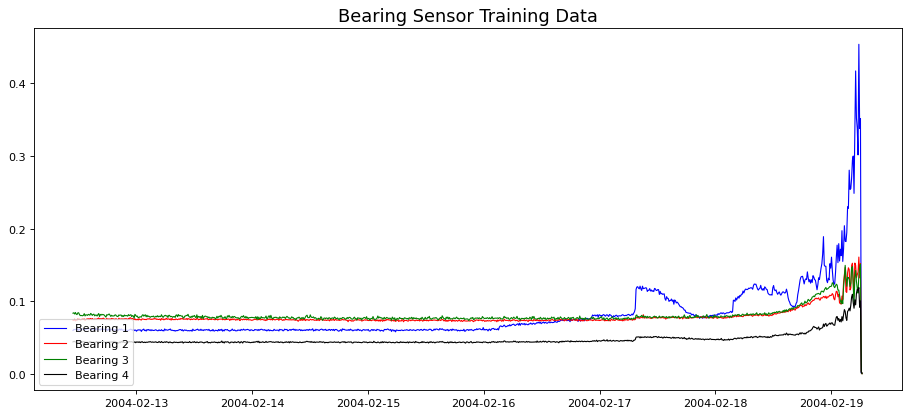

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(bearing_data['Bearing 1'], label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(bearing_data['Bearing 2'], label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(bearing_data['Bearing 3'], label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(bearing_data['Bearing 4'], label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Training Data', fontsize=16)
plt.show()